In [2]:
import scipy
scipy.MachAr

numpy.core.machar.MachAr

# Homework 02 --- Session 3, Multilinear regression

## EX 1 Artificial data (25pt -- 5+5+5+10)
### Dataset 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H31.csv'
### Tasks:
Consider a multivariate regression of the output variable $y$ over the 3 regressors $x_1$, $x_2$, $x_3$ as follows.
* (a) Which one of the regressors serves as dummy variable corresponding to an intercept term?
    * Ignore the first column since it's just a duplicate index (You can avoid it by running **ex1 = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H31.csv', index_col=0)** )
* (b) Calculate the coefficients $\hat w$ manually or with python *numpy* module by using matrix computation.
* (c) Verify your answer by implementing the OLS regression function with python *statsmodels* module.
* (d) Visualize the data points and your fitted model in a 3D plot, like we did in the lab session.

#### Open the file.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
import statsmodels.formula.api as smf 
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [3]:
ex1 = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H31.csv', index_col=0)
ex1

,y,x1,x2,x3
1,0,1,-2,1
2,2,1,-1,-1
3,2,1,0,0
4,3,1,1,-1
5,3,1,2,1


#### (a) X1 serives as the dummy variable


#### (b) Calculate the coefficients  ŵ with python numpy module by using matrix computation

In [4]:
X1 = np.matrix(ex1.loc[:,['x1','x2','x3']])
Y1 = np.matrix(ex1.y).T
w1 = (X1.T * X1).I * X1.T * Y1
print(w1)

[[ 2. ]
 [ 0.7]
 [-0.5]]


#### (c) Verify your answer by implementing the OLS regression function with python statsmodels module.

In [5]:
lm1 = smf.ols(formula = 'y ~ x2 + x3', data = ex1).fit()
print(lm1.params)

Intercept    2.0
x2           0.7
x3          -0.5
dtype: float64


#### (d) Visualize the data points and your fitted model in a 3D plot, like we did in the lab session.

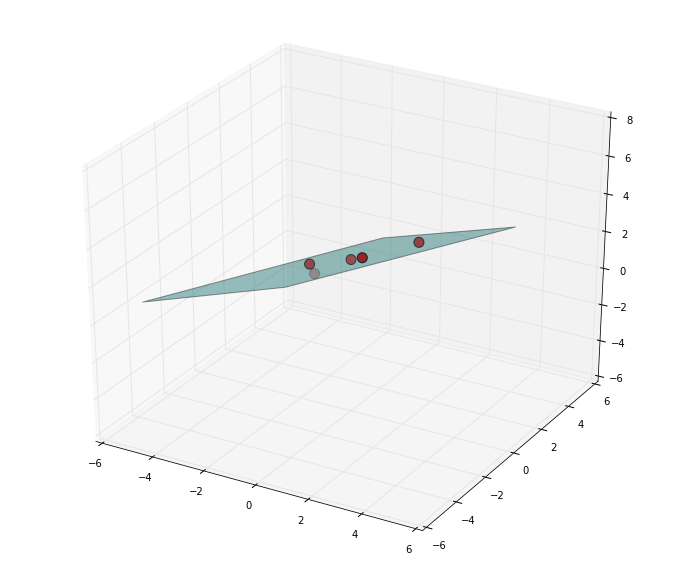

In [6]:
fig = plt.figure(figsize = (12,10))  # Create a plot with customized figure size (width, height)
ax = fig.gca(projection='3d')  # Extract the axis for further operations
ax.scatter(ex1.x2, ex1.x3, ex1.y, s = 100,  c = 'r')
#plt.show
# Scatter plot, "c" stands for color, and "s" determines the marker size

# # Generate coordinates for hyperplane
radius = 5
x1_1, x1_2 = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_y1 = lm1.params[0] + lm1.params[1] * x1_1 + lm1.params[2] * x1_2

# alpha (between 0 and 1) controls the transparency with 0 being totally transparent
ax.plot_surface(x1_1, x1_2, fit_y1, color='c', alpha = 0.4)
# Set labels and fontsize
#

## EX 2, Income vs Insurance coverage (35+10pt -- 10+10+5+10+10)
### Dataset 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/IncomeInsReg.csv'
You are given the demographic data of insurance coverage in NYC, with the details:
* Zip code
* Total population (for each zip code)
* Population with No Insurance coverage
* Population with Insurance coverage
    * Population with Public Insurance coverage
    * Population with Private Insurance coverage

### Tasks:
* (a) Verify that there are some people with BOTH public insurance and private insurance according to this data set, then create a new column containing such information
* (b) Modify the old data frame, or simply create a new one, such that this data frame contains (including but not limited to) the following information in each zipcode area:
    * IncomePerCapita
    * Total Population
    * Population with NO Insurance coverage
    * Population with Public Insurance coverage ONLY
    * Population with Private Insurance coverage ONLY
    * Population with BOTH types of Insurance coverage
* (c) Similar to the lab example, drop the parts with NaN(if any), convert all population number into proportion (percentage, with the form 58.3 instead of 0.583)
* (d) Regress over these proportions (the ones mentioned in part b, leave out "No Insurance Coverage") -- What interesting results do we have here? Briefly state what you've obtained.
#### Extra credit:
* (e) Visualize the observed income versus the predicted income, like what we did in the lab session. Does this fitted line look great or not? If you're not sure, check the correlation matrix and make a guess.

#### (a) Verify that there are some people with BOTH public insurance and private insurance according to this data set, then create a new column containing such information

In [17]:
ex2=pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/IncomeInsReg.csv')
ex2.head()

,Zipcode,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,Public,Private
0,10001,77512.0,22767,1958,20809,5800,16795
1,10002,26905.0,79490,9129,70361,40139,35167
2,10003,79088.0,56909,3774,53135,8593,48522
3,10004,98020.0,3024,244,2780,180,2705
4,10005,99633.0,7566,570,6996,122,6944


In [18]:
#del ex2['BothInsu']
#type(ex2['Public'][1])
#ex2.loc[:,"BothInsu"]=0
ex2.head()

,Zipcode,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,Public,Private
0,10001,77512.0,22767,1958,20809,5800,16795
1,10002,26905.0,79490,9129,70361,40139,35167
2,10003,79088.0,56909,3774,53135,8593,48522
3,10004,98020.0,3024,244,2780,180,2705
4,10005,99633.0,7566,570,6996,122,6944


In [19]:
ex2.loc[:,'BothInsu']=0
for i in range (len(ex2.Zipcode)):
    if  ex2['Public'][i] + ex2['Private'][i] - ex2['WithCoverage'][i] > 0:
        ex2['BothInsu'][i]=ex2['Public'][i] + ex2['Private'][i] - ex2['WithCoverage'][i]
        #ex2['Public'][i]=ex2['Public'][i]-ex2['BothInsu'][i]
        #ex2['Private'][i]=ex2['Private'][i]-ex2['BothInsu'][i]
ex2.head()

/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Zipcode,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,Public,Private,BothInsu
0,10001,77512.0,22767,1958,20809,5800,16795,1786
1,10002,26905.0,79490,9129,70361,40139,35167,4945
2,10003,79088.0,56909,3774,53135,8593,48522,3980
3,10004,98020.0,3024,244,2780,180,2705,105
4,10005,99633.0,7566,570,6996,122,6944,70


#### (b) Modify the old data frame, or simply create a new one, such that this data frame contains (including but not limited to) the following information in each zipcode area:
IncomePerCapita
Total Population
Population with NO Insurance coverage
Population with Public Insurance coverage ONLY
Population with Private Insurance coverage ONLY
Population with BOTH types of Insurance coverage

In [20]:
data2=ex2
for i in range (len(data2.Zipcode)):
        ex2['Public'][i]=ex2['Public'][i]-ex2['BothInsu'][i]
        ex2['Private'][i]=ex2['Private'][i]-ex2['BothInsu'][i]
ex2.head()
#del data2['WithCoverage']
data2.head()

/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Zipcode,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,Public,Private,BothInsu
0,10001,77512.0,22767,1958,20809,4014,15009,1786
1,10002,26905.0,79490,9129,70361,35194,30222,4945
2,10003,79088.0,56909,3774,53135,4613,44542,3980
3,10004,98020.0,3024,244,2780,75,2600,105
4,10005,99633.0,7566,570,6996,52,6874,70


#### (c) Similar to the lab example, drop the parts with NaN(if any), convert all population number into proportion (percentage, with the form 58.3 instead of 0.583)

In [12]:
data2=data2.dropna()
data2['NoCoverage']=data2['NoCoverage'] * 100 / data2['TotalPop']
data2['Public']=data2['Public'] * 100 / data2['TotalPop']
data2['Private']=data2['Private'] * 100 / data2['TotalPop']
data2['BothInsu']=data2['BothInsu'] * 100 / data2['TotalPop']
data2.head()

,Zipcode,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,Public,Private,BothInsu
0,10001,77512.0,22767,0.037775,20809,0.077440,0.289561,0.034456
1,10002,26905.0,79490,0.014448,70361,0.055699,0.047830,0.007826
2,10003,79088.0,56909,0.011653,53135,0.014244,0.137533,0.012289
3,10004,98020.0,3024,0.266825,2780,0.082016,2.843215,0.114822
4,10005,99633.0,7566,0.099573,6996,0.009084,1.200817,0.012228


#### (d) Regress over these proportions (the ones mentioned in part b, leave out "No Insurance Coverage") -- What interesting results do we have here? Briefly state what you've obtained.

In [13]:
lm2 = smf.ols(formula = 'IncomePerCapita ~ Public + Private + BothInsu', data = data2).fit()
#print('R2 = %f'%lm2.rsquared)
print(lm2.params)

Intercept    30006.863251
Public        -427.572365
Private      36575.316938
BothInsu      4184.027487
dtype: float64


####  For each Zipcode area, the number of people who have Private Insurance has a stronger influence than that with Public Insurance on the Imcome per capita.

#### Extra credit:
(e) Visualize the observed income versus the predicted income, like what we did in the lab session. Does this fitted line look great or not? If you're not sure, check the correlation matrix and make a guess.

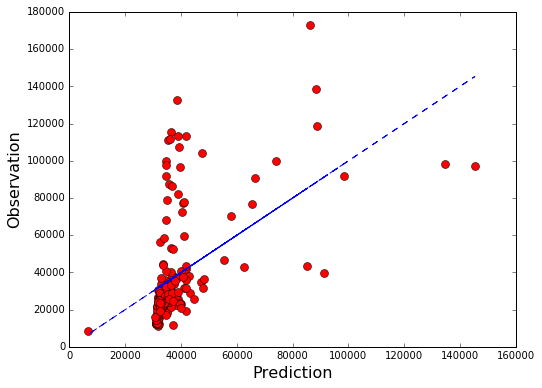

In [14]:
y2_fit = lm2.predict(data2)   # Calculate the predicted value
plt.figure(figsize = (8,6))
plt.plot(y2_fit,data2.IncomePerCapita,'or', markersize = 8) # Plot the observed value, linestyle = 'or', red dots
plt.plot(y2_fit,y2_fit,'--b', linewidth = 1)                 # Plot the predicted value, blue dashed line

# Plot setting
plt.xlabel('Prediction', fontsize = 16)
plt.ylabel('Observation', fontsize = 16)

##### The Prediction does not fit the Observation perfectly. 

In [21]:
print(lm2.params)

Intercept    30006.863251
Public        -427.572365
Private      36575.316938
BothInsu      4184.027487
dtype: float64


## EX 3, Polynomial fit (40+30pt -- 4+5+3$\times$4+5+3$\times$3+5+30)

### Try to fit y with a polynomial $$\hat y(x,w) = \sum\limits_{i=1}^M w_i\cdot x^i$$ with the given dataset 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H33.csv'

### Tasks:
* (a) Draw the scatter plot of x and y, guess what polynomial could be the best choice. (The name "x1" denotes $x^1$.)
* (b) Create new columns in data frame to contain the information of $x^2, x^3, x^4$
* (c) Try to fit y with polynomial of x with order 1, 2, 3, 4, respectively
    * For each model, store your fitted parameters as well as your $R^2$
* (d) Report the $R^2$, plot it and observe how it changes
* (e) Create a figure with four(4) subfigures, then in each subfigure:
    * (e.1) Draw the scatter plot
    * (e.2) Plot the curve of true function $f(x) = 9x^2 - x + 1$
    * (e.3) Plot your fitted curve, observe how our model fits the data as M increases
* (f) Based on the plot, which model(s) fits the true curve best? Then provide the best coefficients $\hat w$
### Extra credit
* (g) In each subfigure:
    * (g.1) Pick a x value (at your discretion) $x_0$, then locate the y value both on your fitted curve and on our function curve ($f(x_0)$)
    * (g.2) Mark these two points with a small diamond, then draw a dashed line connecting them, showing "prediction error" (You can read the lecture slides and find some inspiration at the end.)
    * (g.3) Repeat g.1 and g.2 up to ten times (i.e. select up to ten different future points and predict their values, compare your prediction with the true value), then:
        * Compute the average sum of squares of errors $E = \frac{\sum_i^n (y_i - f(x_i))^2}{n}$ ($x_i$ denotes your future points), mention it in your subfigure's title (**Be sure to use the SAME future points for ALL 4 models when you calculate prediction error**)
        * Which model has the smallest average error $E$? Does this fitted polynomial coincides with the M you picked in part f?

In [23]:
ex3=pd.read_csv( 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H33.csv')
ex3

,y,x1
0,2.613388,-0.50
1,2.170351,-0.32
2,0.049546,-0.14
3,1.158258,0.04
4,1.397567,0.22
5,1.773240,0.40


#### (a) Draw the scatter plot of x and y, guess what polynomial could be the best choice. (The name "x1" denotes  x1 .)

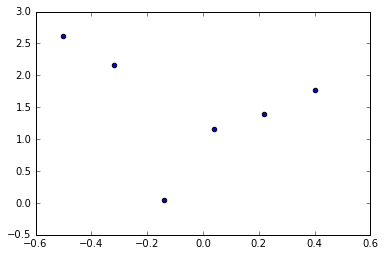

In [24]:
#plt.figure(figsize = (8,6))
plt.scatter(ex3.x1,ex3.y)

#### (b) Create new columns in data frame to contain the information of  x2,x3,x4

In [25]:
ex3.loc[:,'x2']=ex3.x1**2
ex3.loc[:,'x3']=ex3.x1**3
ex3.loc[:,'x4']=ex3.x1**4
ex3

,y,x1,x2,x3,x4
0,2.613388,-0.50,0.2500,-0.125000,0.062500
1,2.170351,-0.32,0.1024,-0.032768,0.010486
2,0.049546,-0.14,0.0196,-0.002744,0.000384
3,1.158258,0.04,0.0016,0.000064,0.000003
4,1.397567,0.22,0.0484,0.010648,0.002343
5,1.773240,0.40,0.1600,0.064000,0.025600


#### (c) Try to fit y with polynomial of x with order 1, 2, 3, 4, respectively
For each model, store your fitted parameters as well as your  R2

In [26]:
def MultiReg(data, degree):
    # First create a string for controlling the number of x_i
    string = ''
    for i in range(degree):
        string += str(i+1)  # For example, if degree == 3, then this string would be '123' at the end
    formula = 'y ~ x' + ' + x'.join(string) # join function will convert '123' to '1 + x2 + x3'

    # Perform regression and return the results
    lm = smf.ols(formula = formula, data = data).fit()
    return lm.rsquared, lm.params


# Run the function and store the results separately
R3 = []; Params = []
for M in range(1,5):
    a,b = MultiReg(ex3,M)  # For each M, run the function
    R3.append(a)
    Params.append(b)
R3


[0.10479617162381571,
 0.65125881311682743,
 0.66574886312199211,
 0.80198630229302026]

#### (d) Report the  R2 , plot it and observe how it changes

In [27]:
for i in range (0,4):
    print '(R%s)^2= %s'%(i+1, R3[i])

(R1)^2= 0.104796171624
(R2)^2= 0.651258813117
(R3)^2= 0.665748863122
(R4)^2= 0.801986302293


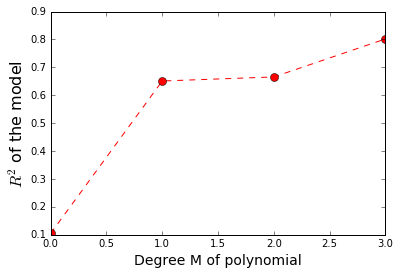

In [28]:
#Q3 See how $R^2$ increases as the degree of polynomial increases 
plt.plot(range(0,4),R3,'ro--', markersize = 8)
plt.xlabel('Degree M of polynomial', fontsize = 14)
plt.ylabel('$R^2$ of the model', fontsize = 16)
plt.show()

#### (e) Create a figure with four(4) subfigures, then in each subfigure:
(e.1) Draw the scatter plot

(e.2) Plot the curve of true function  f(x)=9x2−x+1

(e.3) Plot your fitted curve, observe how our model fits the data as M increases

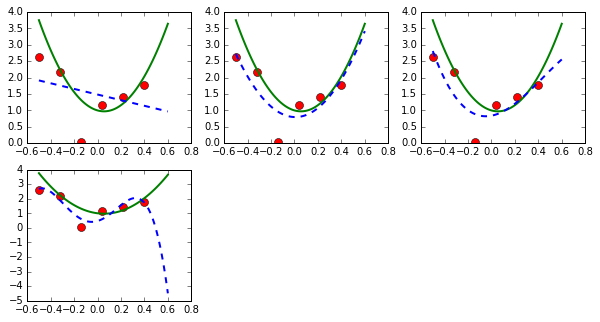

In [29]:
plt.figure(figsize = (10,8))

f = lambda x: 9*x**2 - x + 1

for M in range(1,5):
    plt.subplot(330+M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(-0.5,0.6,100)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    # Pay attention how we obtain the results by controlling the axes on which the operations are performed
#     y_future = 0
#     x_future = 0.55
#     for i in range(len(Params[M-1])):
#         y_future += Params[M-1][i] * (x_future**i)
    plt.plot(ex3.x1, ex3.y, 'ro', markersize = 8)    # Red dots, the observations
    plt.plot(x_fit, f(x_fit), 'g-', lw = 2)              # Green curve, the actual function f defined before
    plt.plot(x_fit, y_fit, 'b--', lw = 2)                # Blue dashed line, our fitted curve
#     plt.plot(x_future, y_future, 'b*', markersize = 18)        # Blue star, fitted value
#     plt.plot(x_future, f(x_future), 'g*', markersize = 18)     # Green star, true value
#     plt.plot([x_future,x_future], [y_future, f(x_future)])


#### When M=2 which means  

#### (f) Based on the plot, which model(s) fits the true curve best? Then provide the best coefficients  ŵ

#### The 2-degree polynomial model fits the curve best

In [30]:
print 'w: '
Params[1]

w: 


Intercept    0.797871
x1          -0.112869
x2           7.459218
dtype: float64

#### Extra credit

##### (1)Pick a x value (at your discretion)  x0 , then locate the y value both on your fitted curve and on our function curve ( f(x0))

##### My X0=0.55

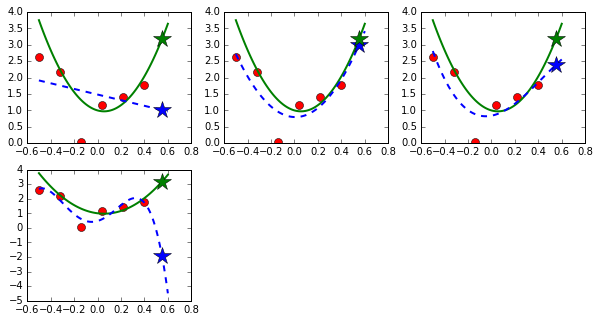

In [31]:
plt.figure(figsize = (10,8))

f = lambda x: 9*x**2 - x + 1

for M in range(1,5):
    plt.subplot(330+M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(-0.5,0.6,100)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    #Pay attention how we obtain the results by controlling the axes on which the operations are performed
    y_future = 0
    x_future = 0.55
    for i in range(len(Params[M-1])):
        y_future += Params[M-1][i] * (x_future**i)
    plt.plot(ex3.x1, ex3.y, 'ro', markersize = 8)    # Red dots, the observations
    plt.plot(x_fit, f(x_fit), 'g-', lw = 2)              # Green curve, the actual function f defined before
    plt.plot(x_fit, y_fit, 'b--', lw = 2)                # Blue dashed line, our fitted curve
    plt.plot(x_future, y_future, 'b*', markersize = 18)        # Blue star, fitted value
    plt.plot(x_future, f(x_future), 'g*', markersize = 18)     # Green star, true value
   # plt.plot([x_future,x_future], [y_future, f(x_future)])


##### (g.2) Mark these two points with a small diamond, then draw a dashed line connecting them, showing "prediction error" (You can read the lecture slides and find some inspiration at the end.)

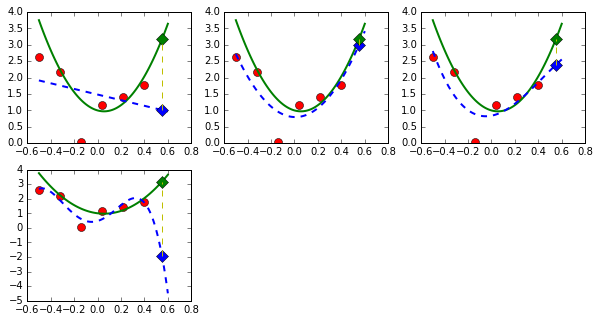

In [243]:
plt.figure(figsize = (10,8))

f = lambda x: 9*x**2 - x + 1

for M in range(1,5):
    plt.subplot(330+M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(-0.5,0.6,100)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    #Pay attention how we obtain the results by controlling the axes on which the operations are performed
    y_future = 0
    x_future = 0.55
    for i in range(len(Params[M-1])):
        y_future += Params[M-1][i] * (x_future**i)
    plt.plot(ex3.x1, ex3.y, 'ro', markersize = 8)    # Red dots, the observations
    plt.plot(x_fit, f(x_fit), 'g-', lw = 2)              # Green curve, the actual function f defined before
    plt.plot(x_fit, y_fit, 'b--', lw = 2)                # Blue dashed line, our fitted curve
    plt.plot(x_future, y_future, 'bD', markersize = 8)        # Blue star, fitted value
    plt.plot(x_future, f(x_future), 'gD', markersize = 8)     # Green star, true value
    plt.plot([x_future,x_future], [y_future, f(x_future)],'y--')

#### (g.3) Repeat g.1 and g.2 up to ten times (i.e. select up to ten different future points and predict their values, compare your 
        * Compute the average sum of squares of errors $E = \frac{\sum_i^n (y_i - f(x_i))^2}{n}$ ($x_i$ denotes your future points), mention it in your subfigure's title (**Be sure to use the SAME future points for ALL 4 models when you calculate prediction error**)
        * Which model has the smallest average error $E$? Does this fitted polynomial coincides with the M you picked in part f?

err1=17.616193, err2=0.370841, err3=3.098120, err3=175.798397


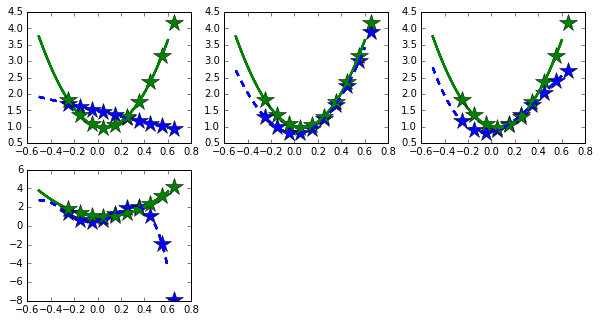

In [54]:

plt.figure(figsize = (10,8))

f = lambda x: 9*x**2 - x + 1
err=[]
for M in range(1,5):
    plt.subplot(330+M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(-0.5,0.6,100)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    #Pay attention how we obtain the results by controlling the axes on which the operations are performed
    for Z in range (0,10):
        y_future = 0
        x_future = 0.65-0.1*Z
        for i in range(len(Params[M-1])):
            y_future += Params[M-1][i] * (x_future**i)
#     plt.plot(ex3.x1, ex3.y, 'ro', markersize = 8)    # Red dots, the observations
        plt.plot(x_fit, f(x_fit), 'g-', lw = 2)              # Green curve, the actual function f defined before
        plt.plot(x_fit, y_fit, 'b--', lw = 2)                # Blue dashed line, our fitted curve
        plt.plot(x_future, y_future, 'b*', markersize = 18)        # Blue star, fitted value
        plt.plot(x_future, f(x_future), 'g*', markersize = 18)     # Green star, true value
        dist= (y_future-f(x_future))**2
        err.append(dist)
   # plt.plot([x_future,x_future], [y_future, f(x_future)])
#print err
err1=sum(err[0:9])
err2=sum(err[10:19])
err3=sum(err[20:29])
err4=sum(err[30:39])
print 'err1=%f, err2=%f, err3=%f, err3=%f' %(err1,err2,err3,err4)

#### Then second model with x**2 has the smallest error, it matches the one picked in part f.